In [13]:
import numpy as np 
import scipy.io as spio
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

In [14]:
const_K = 'True'
if const_K=='True':
    FOLDER_SUB = "constant_carrying_capacity"
    state = "constant"
    tscale = 10
elif const_K=='False':
    FOLDER_SUB = "oscillating_carrying_capacity"
    state = "oscillating"
    tscale = 1
    
K=5
days = 30


In [15]:

# plt.title('title',**csfont)
# plt.xlabel('xlabel', **hfont)
# plt.show()


In [16]:
reps=50

In [17]:
data_folder = Path("../../../python_directory/Results/precision_results/")
i=0
tmi_jsd=np.zeros((50,4))
ctf_jsd=np.zeros((50,4))
lasso_jsd=np.zeros((50,4))

for i, nRead in enumerate([1000,2500,5000,10000]):

    basename =  "GLV_" + str(reps) + "_runs_" +str(state) + "_K_" + str(tscale*days)+ "_days_multinomial_sampling_" + str(nRead) + "_reads_" + f'K{K}_precision_results.mat'

    file_to_open = data_folder / FOLDER_SUB/ basename

    f = spio.loadmat(file_to_open)
    
    jsd_div = f['JSD']/30
    
    tmi_jsd[:,i] = jsd_div[:,0]
    ctf_jsd[:,i] = jsd_div[:,1]
    lasso_jsd[:,i] = jsd_div[:,2]
          

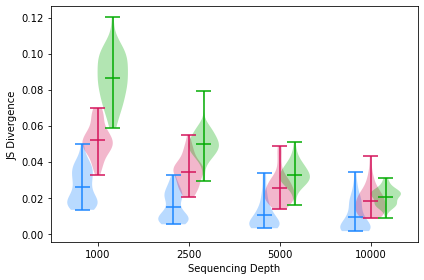

In [27]:
c = np.array([[26,133,255],[212,17,89],[0,170,0]])/255

plt.figure()
ps = np.arange(0,4*6,6)
pw=2
v = 3*[0]
v[0] = plt.violinplot(tmi_jsd,showextrema= True, showmeans = True,positions =ps,widths = pw)
v[1] = plt.violinplot(ctf_jsd,showmeans = True,positions =ps+1,widths = pw)
v[2] = plt.violinplot(lasso_jsd,showmeans = True,positions =ps+2,widths = pw)
plt.xticks(ps+1, [1000,2500,5000,10000]) 
plt.ylabel('JS Divergence')
plt.xlabel('Sequencing Depth')
for meth in range(3):
    for i in range(4):
        v[meth]["bodies"][i].set_facecolor(c[meth,:])
        v[meth]["cmeans"].set_color(c[meth,:])
        v[meth]["cmins"].set_color(c[meth,:])
        v[meth]["cmaxes"].set_color(c[meth,:])
        v[meth]["cbars"].set_color(c[meth,:])
# matplotlib.rc('font', **font)
plt.tight_layout()

plt.savefig('test.svg', format='svg')

plt.show()

KeyError: 'cmins'

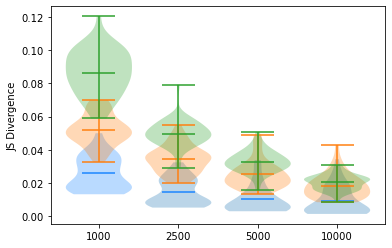

In [23]:
plt.figure()
ps = np.array([0,3,6,9])
pw=2.5
v[0] = plt.violinplot(tmi_jsd,showmeans = True,showextrema = False, positions =ps,widths = pw)
v[1] = plt.violinplot(ctf_jsd,showmeans = True,positions =ps,widths = pw)
v[2] = plt.violinplot(lasso_jsd,showmeans = True,positions =ps,widths = pw)
plt.xticks(ps, [1000,2500,5000,10000]) 
plt.ylabel('JS Divergence')
for meth in range(3):
    for i in range(4):
        v[meth]["bodies"][i].set_facecolor(c[meth,:])
        v[meth]["cmeans"].set_color(c[meth,:])
        v[meth]["cmins"].set_color(c[meth,:])
        v[meth]["cmaxes"].set_color(c[meth,:])
        v[meth]["cbars"].set_color(c[meth,:])

plt.show()